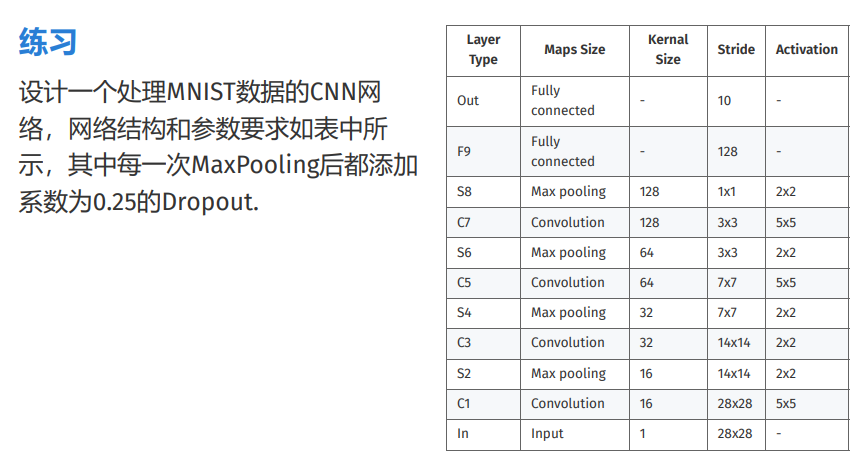

In [1]:
import os 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

(60000, 28, 28)

In [5]:
'''
输入图像：[批量数，高度，宽度，通道]形式的4维张量
'''
X_train4D=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test4D=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [6]:
X_train4D_Normalize=X_train4D/255.0
X_test4D_Normalize=X_test4D/255.0

y_trainOnehot=to_categorical(y_train)
y_testOnehot=to_categorical(y_test)

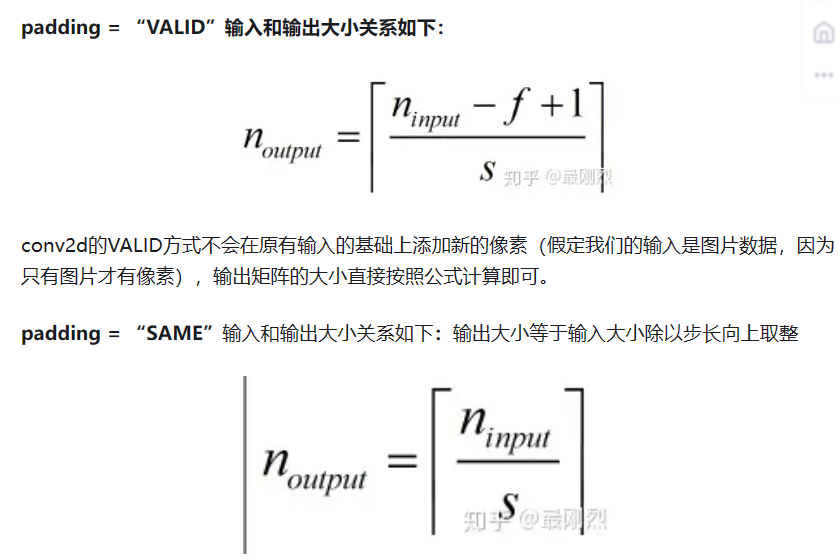

In [12]:
model=Sequential()

model.add(
    Conv2D(filters=16,
           kernel_size=(5,5),
           input_shape=(28,28,1),
           padding='SAME',
           activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(
    Conv2D(filters=32,
           kernel_size=(2,2),
           padding='SAME',
           activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(
    Conv2D(filters=64,
           kernel_size=(5,5),
           padding='SAME',
           activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(
    Conv2D(filters=128,
           kernel_size=(5,5),
           padding='SAME',
           activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)         

#### label使用one hot编码，然后模型的loss使用categorical_crossentropy
#### label不用one hot编码，然后模型的loss使用sparse_categorical_crossentropy

In [18]:
'''编译'''
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

'''训练'''
epochs=10
history=model.fit(x=X_train4D_Normalize,
                  y=y_trainOnehot,
                  epochs=epochs,
                  validation_split=0.2
                  )

Epoch 1/10
1500/1500 [==============================] - 37s 24ms/step - loss: 0.3087 - accuracy: 0.9013 - val_loss: 0.0655 - val_accuracy: 0.9795
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.0603 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0722 - accuracy: 0.9790 - val_loss: 0.0429 - val_accuracy: 0.9879
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0432 - val_accuracy: 0.9889
Epoch 6/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0338 -

In [19]:
'''评估'''
test_loss, test_acc = model.evaluate(X_test4D_Normalize,y_testOnehot,verbose=2) #损失值和准确率
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 2s - loss: 0.0269 - accuracy: 0.9915

Test accuracy: 0.9915000200271606

Test loss: 0.026902563869953156
